---
# **Projek Pertama - Klasifikasi Penyakit Jantung**


---
Author : `David Mario Yohanes Samosir`


# CRISP - DM
## 1. Data Understanding
- Memprediksi apakah seseorang terjangkit penyakit jantung berdasarkan beberapa atribut kesehatan

## 2. Data Preparation
- Dataset: [Heart_disease](https://www.kaggle.com/datasets/dharanireddy/heart-disease)

- Fitur yang digunakan:
    1. age - Usia dalam tahun
    2. sex - (1 = male; 0 = female)
    3. cp - chest pain type
      - 0: Typical angina: nyeri dada terkait mengurangi suplai darah ke jantung
      - 1: Atypical angina: nyeri dada tidak berhubungan dengan jantung
      - 2: Non-anginal pain: biasanya kejang esofagus (tidak berhubungan dengan jantung)
      - 3: Asymptomatic: nyeri dada tidak menunjukkan tanda-tanda penyakit
    4. trestbps - mengistirahatkan tekanan darah (dalam mm Hg saat masuk ke rumah sakit)
      - di atas 130-140 biasanya memprihatinkan
    5. chol - serum cholestoral dalam mg/dl
      - serum = LDL + HDL + .2 * triglycerides
      - di atas 200 yang memprihatinkan
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      - '>126' mg/dL signals diabetes
    7. restecg - resting electrocardiographic results
      - 0: Tidak ada yang perlu diperhatikan
      - 1: ST-T Wave abnormality
        - dapat berkisar dari gejala ringan hingga masalah parah
        - sinyal detak jantung yang tidak normal
      - 2: Possible or definite left ventricular hypertrophy
        - Ruang pompa utama jantung yang diperbesar
    8. thalach - denyut jantung maksimum tercapai
    9. exang - latihan diinduksi angina (1 = yes; 0 = no)
    10. oldpeak - Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
      - melihat stres jantung saat berolahraga
      - jantung yang tidak sehat akan lebih stres
    11. slope - kemiringan segmen ST latihan puncak
      - 0: Upsloping: detak jantung yang lebih baik dengan olahraga (tidak biasa)
      - 1: Flatsloping: perubahan minimal (jantung sehat yang khas)
      - 2: Downslopins: tanda-tanda jantung yang tidak sehat
    12. ca - jumlah pembuluh darah utama (0-3) diwarnai oleh flourosopy
      - pembuluh berwarna berarti dokter dapat melihat darah yang melewatinya
      - semakin banyak gerakan darah semakin baik (tidak ada gumpalan)
    13. thal - hasil stres thalium
      - 1,3: normal
      - 6: fixed defect: dulu cacat tapi sekarang baik-baik saja
      - 7: reversable defect: tidak ada gerakan darah yang tepat saat berolahraga
    14. target - memiliki penyakit atau tidak (1=yes, 0=no) (= atribut yang diprediksi)

## 3. Data Wrangling
Langkah-langkah:

- Muat dataset dan pahami struktur data.
- Identifikasi dan tangani missing values jika ada.
- Lakukan encoding untuk variabel kategorikal jika diperlukan.
- Lakukan normalisasi atau standarisasi data untuk mempersiapkan fitur-fitur numerik.

## 4. Model Training
Langkah-langkah:

- Bagi dataset menjadi training set dan testing set.
- Pilih beberapa model klasifikasi seperti Logistic Regression, Random Forest, atau SVM.
- Latih model menggunakan training set.

## 5. Model Testing
Langkah-langkah:

- Gunakan model yang telah dilatih untuk membuat prediksi menggunakan testing set.

## 6. Model Evaluation
Langkah-langkah:

- Evaluasi model menggunakan berbagai metrik seperti accuracy, precision, recall, dan F1-score.
- Analisis confusion matrix untuk memahami performa model lebih lanjut.

# Instalasi Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import pickle

# Data Wrangling

## Gathering Data

### Upload File

In [2]:
# Mengunggah file dari komputer lokal
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
# Contoh: Menyimpan file yang diunggah ke dalam file lokal di Colab
with open('heart.csv', 'wb') as f:
    f.write(uploaded['heart.csv'])

In [4]:
# Load Dataset
dataset = pd.read_csv('./heart.csv')

In [5]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Assessing Data

In [6]:
print(dataset.shape)

(303, 14)


In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.duplicated().sum()

1

In [10]:
# Cari tahu berapa banyak nilai dari age
dataset.age.value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [11]:
# Cari tahu berapa banyak nilai dari sex
dataset.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Cari tahu berapa banyak nilai dari nyeri dada (cp)
dataset.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [13]:
# Cari tahu berapa banyak nilai dari tekanan darah
dataset.trestbps.value_counts()

trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

In [14]:
# Cari tahu berapa banyak nilai dari kolestrol
dataset.chol.value_counts()

chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

In [15]:
# Cari tahu berapa banyak nilai dari kadar diabetes
dataset.fbs.value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [16]:
# Cari tahu berapa banyak nilai dari aktivitas jantung
dataset.restecg.value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [17]:
# Cari tahu berapa banyak nilai dari denyut jantung
dataset.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [18]:
# Cari tahu berapa banyak nilai dari latihan diinduksi angina
dataset.exang.value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [19]:
# Cari tahu berapa banyak nilai dari olahraga
dataset.oldpeak.value_counts()

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64

In [20]:
# Cari tahu berapa banyak nilai dari kemiringan segmen ST
dataset.slope.value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [21]:
# Cari tahu berapa banyak nilai dari jumlah pembuluh darah
dataset.ca.value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [22]:
# Cari tahu berapa banyak nilai dari hasil stress thalium
dataset.thal.value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [23]:
# Cari tahu berapa banyak nilai dari target
dataset.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

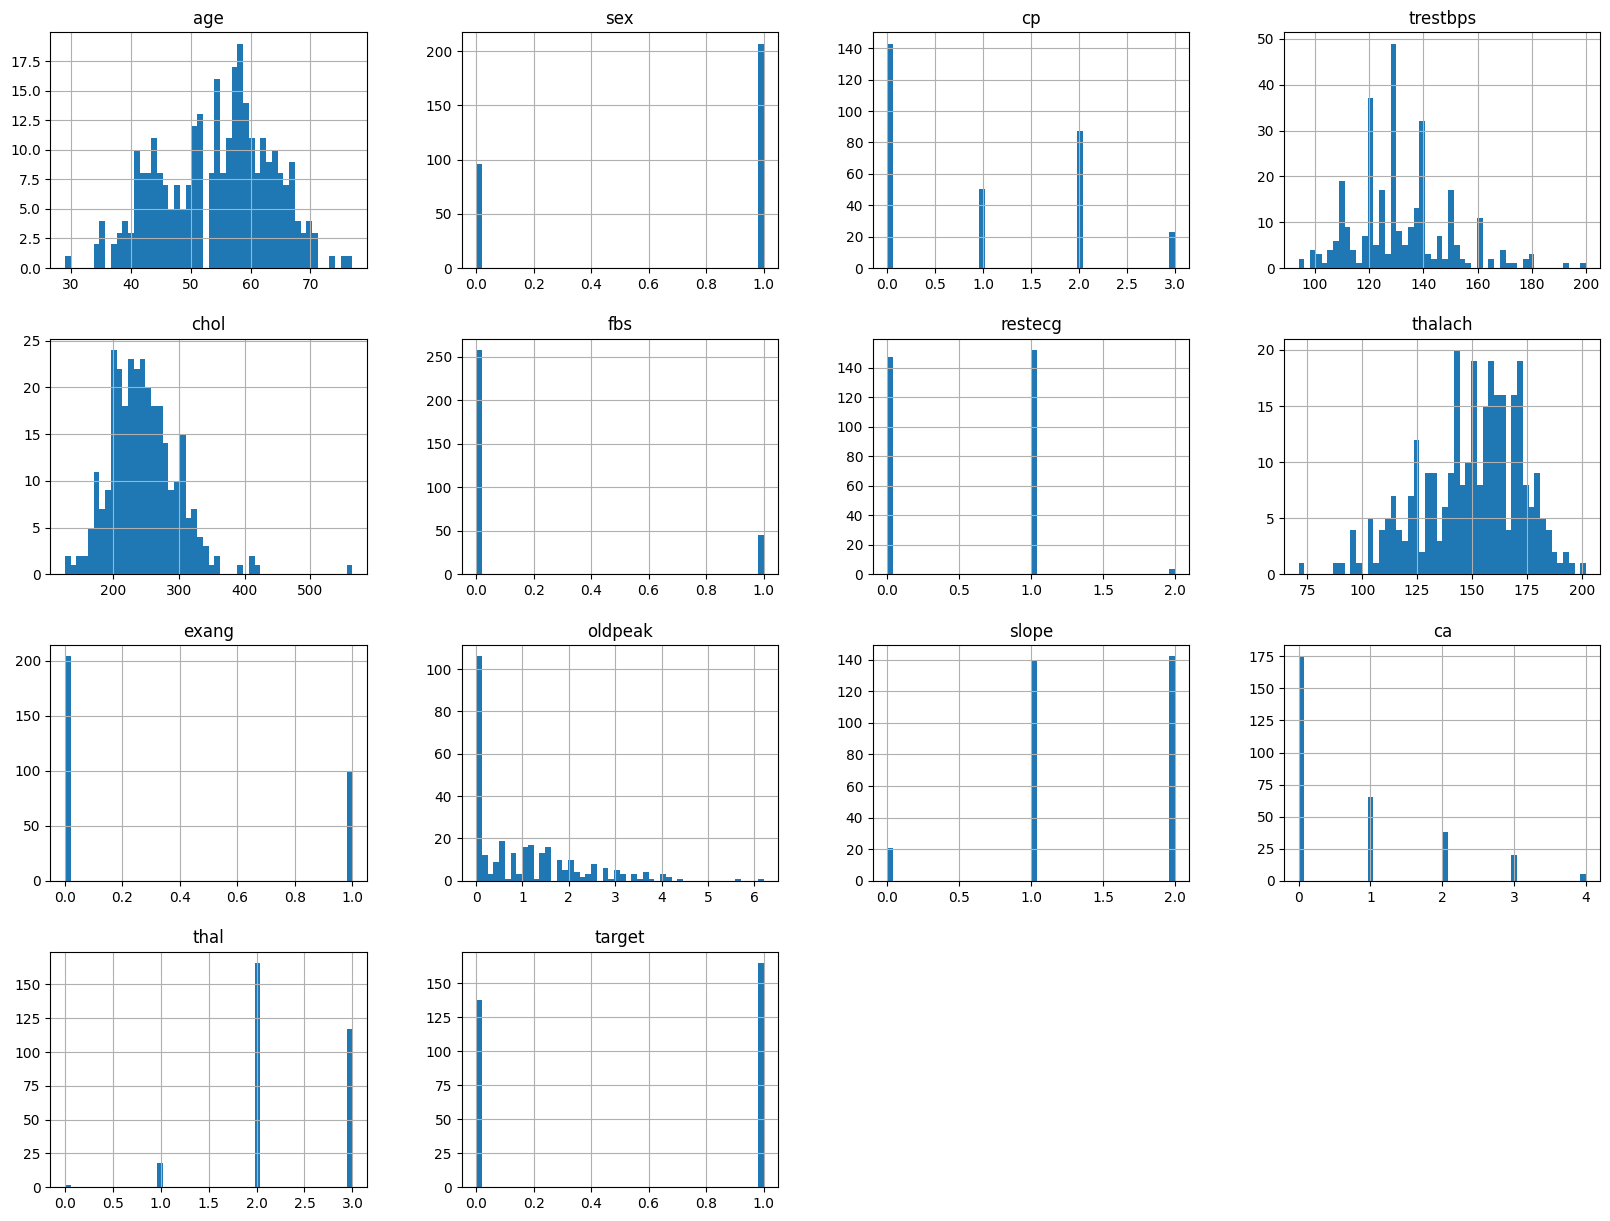

In [24]:
# Histogram untuk kolom numerik
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

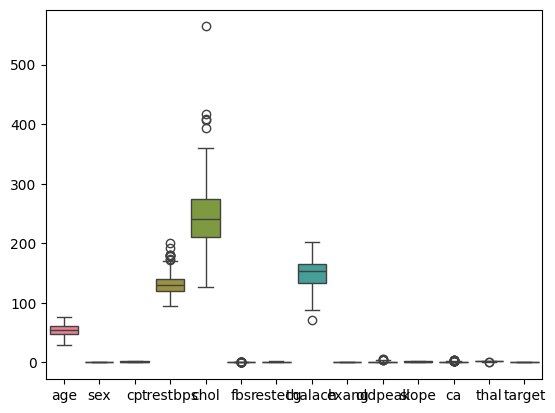

In [25]:
# Boxplot untuk mendeteksi outlier
sns.boxplot(data=dataset.select_dtypes(include=['float64', 'int64']))
plt.show()

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


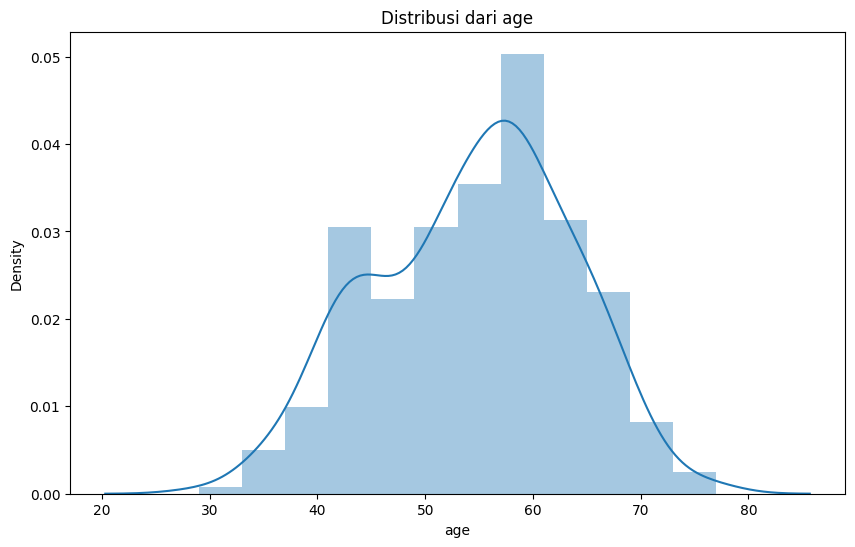

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


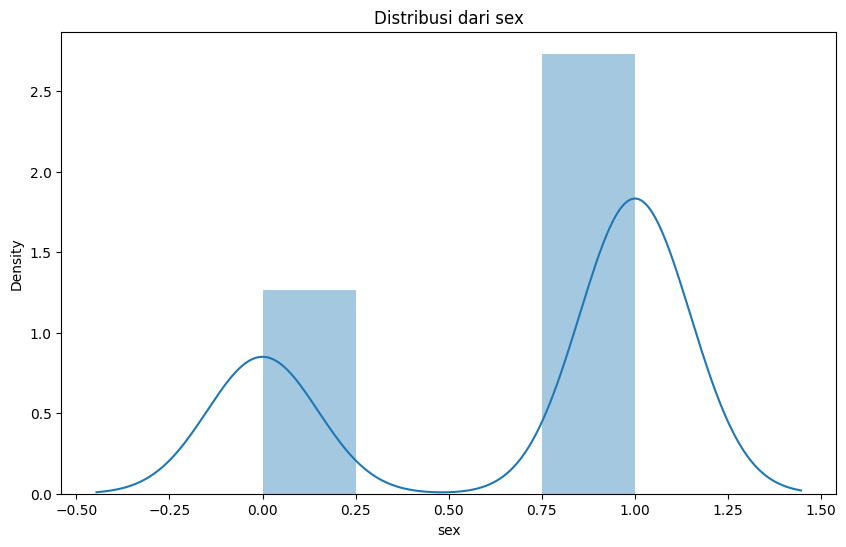

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


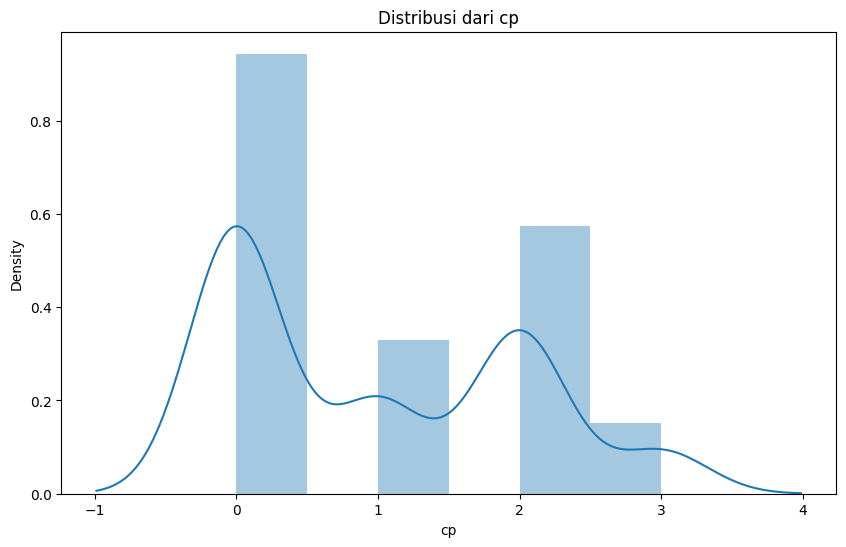

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


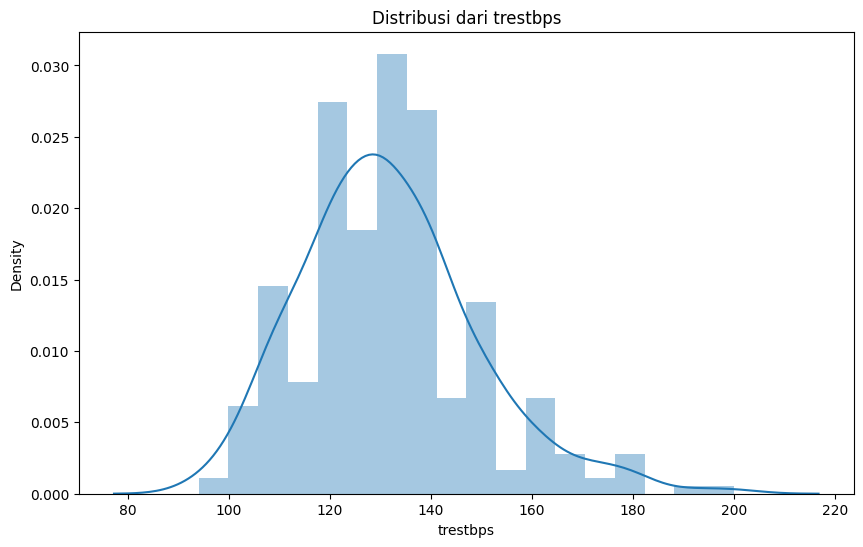

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


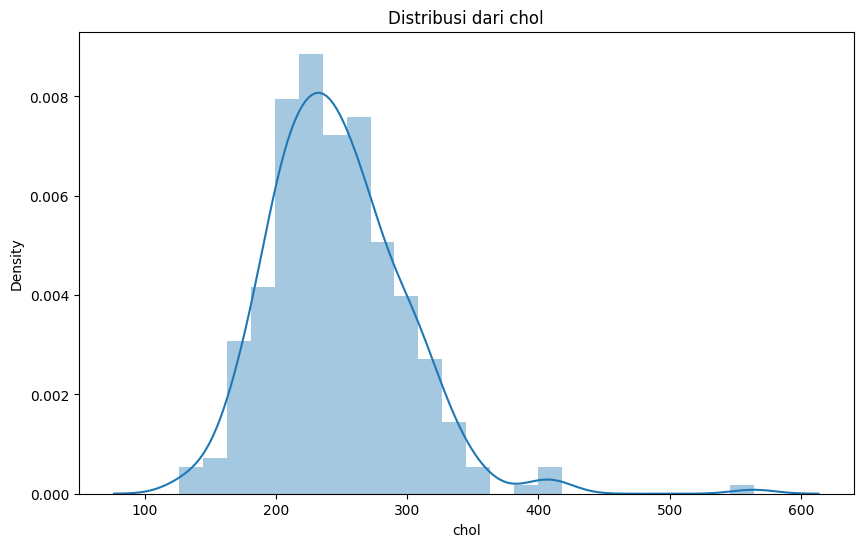

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


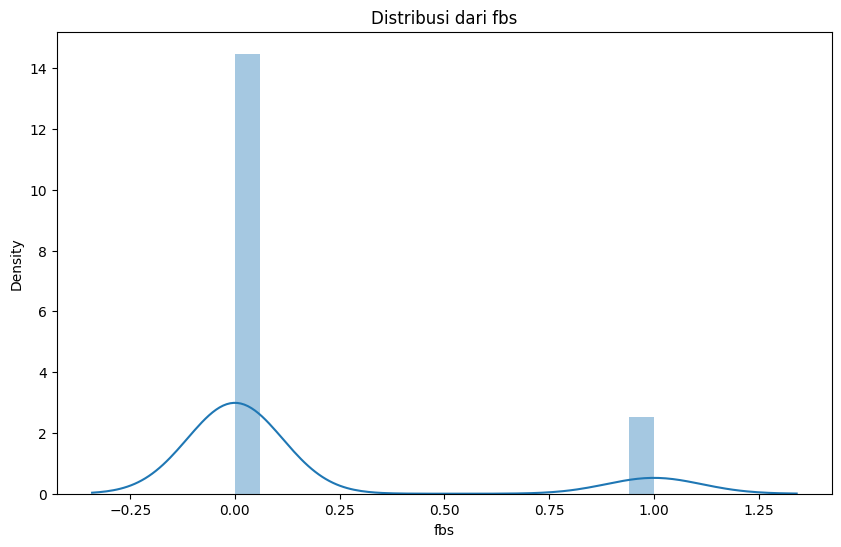

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


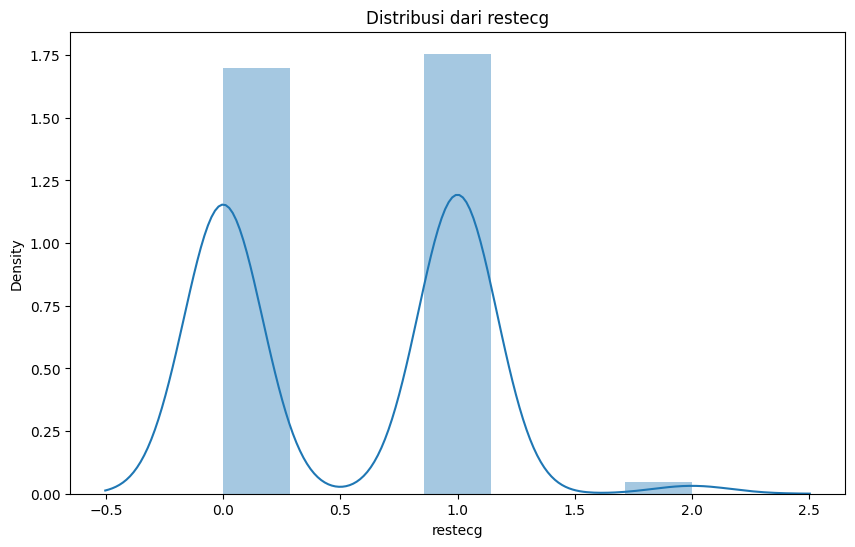

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


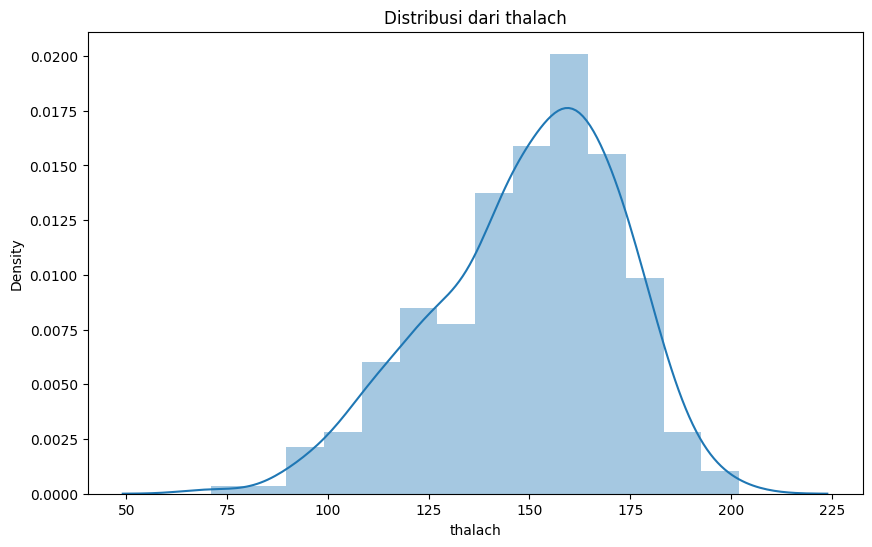

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


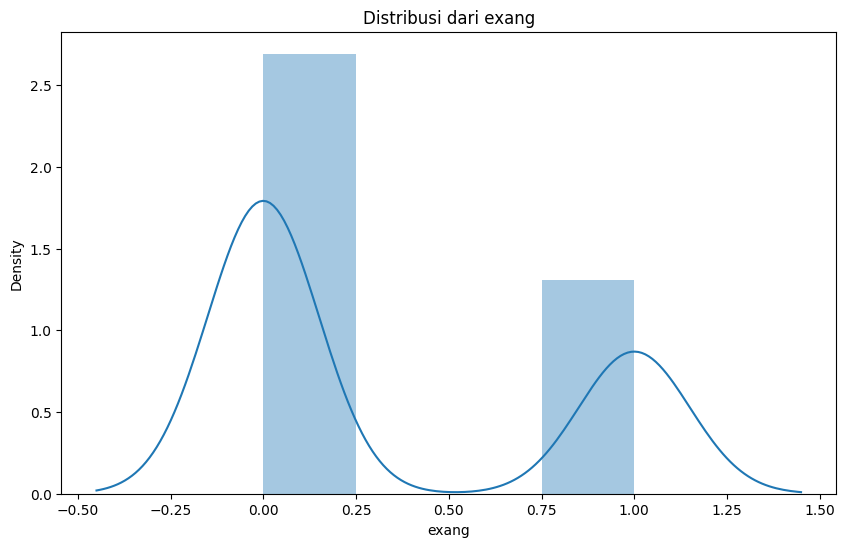

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


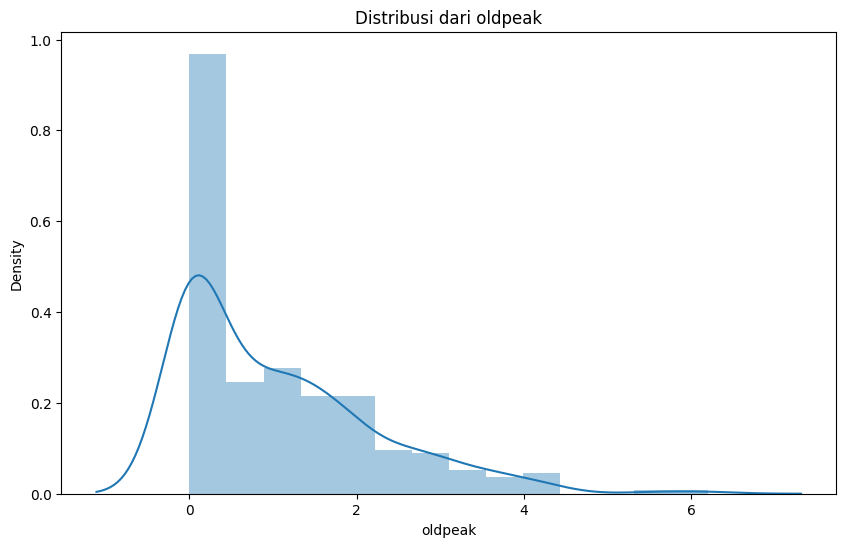

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


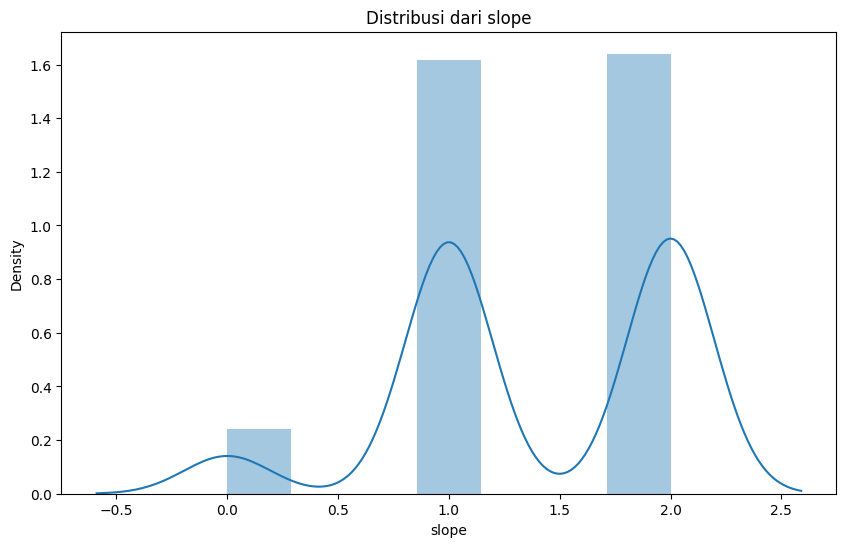

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


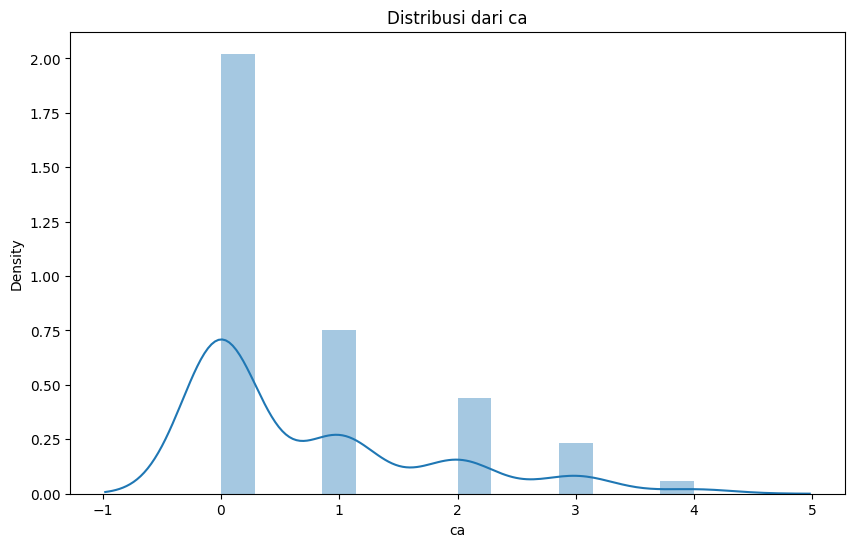

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


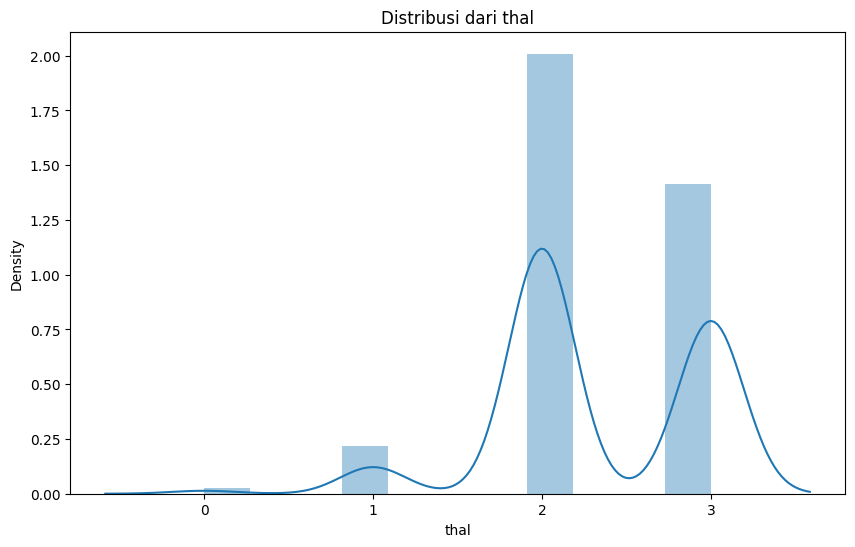

<ipython-input-26-68c5b73fdf54>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column].dropna(), kde=True)


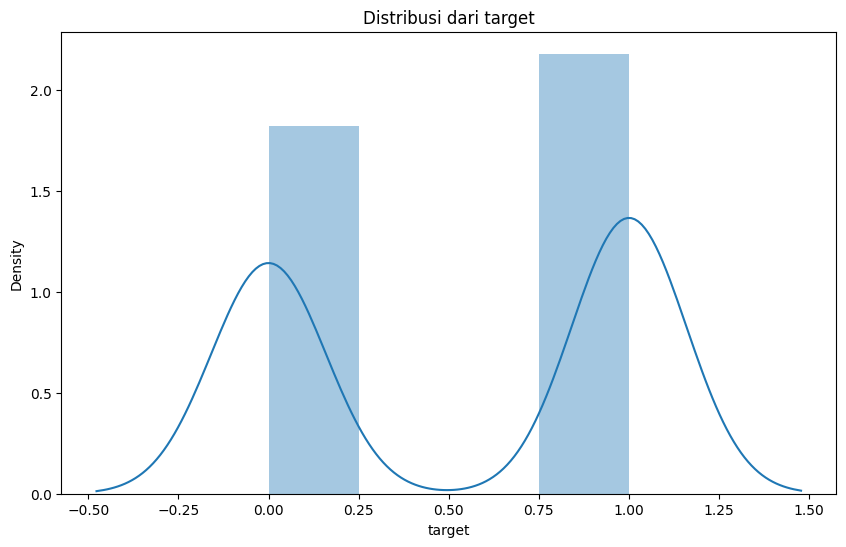

In [26]:
for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(dataset[column].dropna(), kde=True)
    plt.title(f'Distribusi dari {column}')
    plt.show()

## Cleaning Data

In [27]:
# Menghapus baris yang duplikat
dataset.drop_duplicates(inplace=True)
print("Jumlah nilai duplikat:", dataset.duplicated().sum())

Jumlah nilai duplikat: 0


# Exploratory Data Analysis (EDA)

In [28]:
# Matriks korelasi
corr_matrix = dataset.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


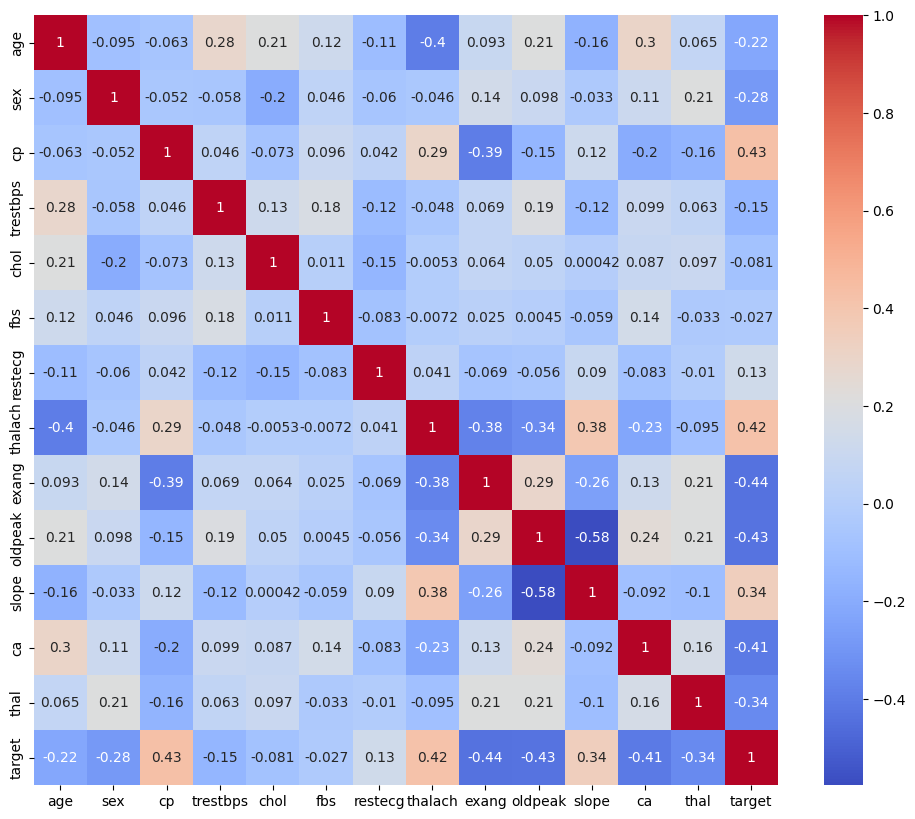

In [29]:
# Heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<h3> Frekuensi Jenis Kelamin

In [30]:
# Frekuensi jenis kelamin
sex_counts = dataset["sex"].value_counts()
print("Frekuensi Jenis Kelamin:")
print(sex_counts)

Frekuensi Jenis Kelamin:
sex
1    206
0     96
Name: count, dtype: int64


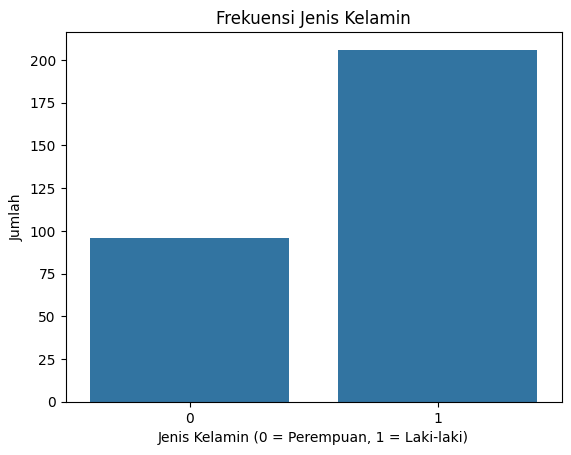

In [31]:
# Visualisasi frekuensi jenis kelamin
sns.countplot(x="sex", data=dataset)
plt.title("Frekuensi Jenis Kelamin")
plt.xlabel("Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)")
plt.ylabel("Jumlah")
plt.show()

<h3> Distribusi Usia

In [32]:
# Statistik deskriptif untuk usia
age_stats = dataset["age"].describe()
print("Statistik Deskriptif Usia:")
print(age_stats)

Statistik Deskriptif Usia:
count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64


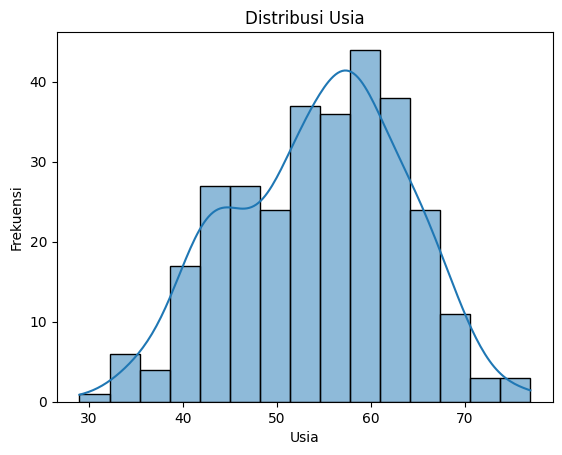

In [33]:
# Visualisasi distribusi usia
sns.histplot(dataset["age"], bins=15, kde=True)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

<h3> Distribusi Target

In [34]:
# Frekuensi target
target_counts = dataset["target"].value_counts()
print("Frekuensi Target:")
print(target_counts)

Frekuensi Target:
target
1    164
0    138
Name: count, dtype: int64


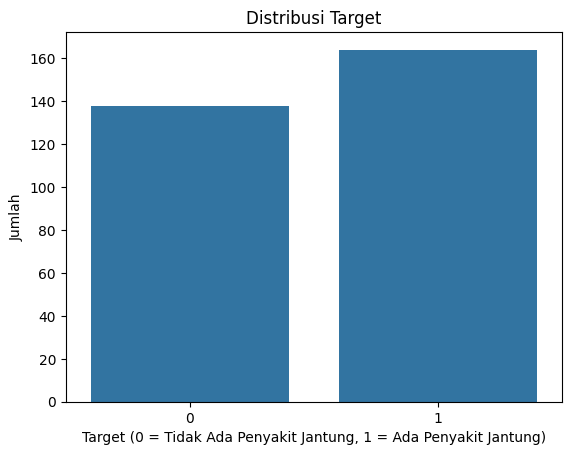

In [35]:
# Visualisasi distribusi target
sns.countplot(x="target", data=dataset)
plt.title("Distribusi Target")
plt.xlabel("Target (0 = Tidak Ada Penyakit Jantung, 1 = Ada Penyakit Jantung)")
plt.ylabel("Jumlah")
plt.show()

### Korelasi Berdasarkan Target

<h3> Rata-rata Tekanan Darah Berdasarkan Target

In [36]:
# Rata-rata tekanan darah berdasarkan target
mean_trestbps_by_target = dataset.groupby("target")["trestbps"].mean()
print("Rata-rata Tekanan Darah Berdasarkan Target:")
print(mean_trestbps_by_target)

Rata-rata Tekanan Darah Berdasarkan Target:
target
0    134.398551
1    129.250000
Name: trestbps, dtype: float64


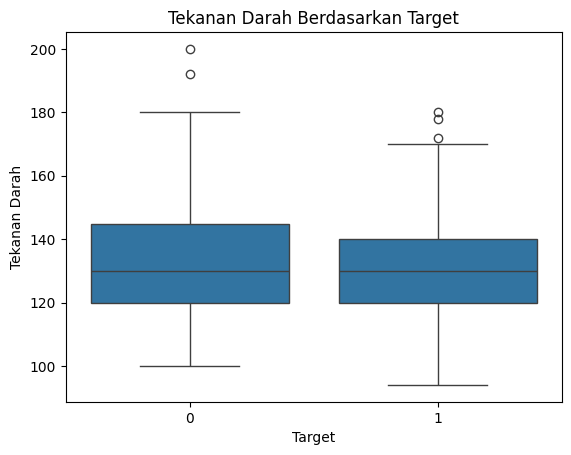

In [37]:
# Box plot untuk tekanan darah berdasarkan target
sns.boxplot(x="target", y="trestbps", data=dataset)
plt.title("Tekanan Darah Berdasarkan Target")
plt.xlabel("Target")
plt.ylabel("Tekanan Darah")
plt.show()

<h3> Distribusi Nyeri Dada

In [38]:
# Distribusi nyeri dada berdasarkan target
cp_distribution = dataset.groupby("target")["cp"].value_counts().unstack()
print("Distribusi Nyeri Dada Berdasarkan Target:")
print(cp_distribution)

Distribusi Nyeri Dada Berdasarkan Target:
cp        0   1   2   3
target                 
0       104   9  18   7
1        39  41  68  16


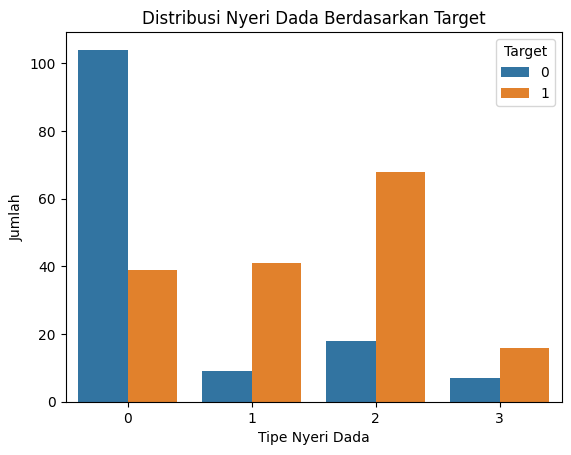

In [39]:
# Count plot untuk nyeri dada berdasarkan target
sns.countplot(x="cp", hue="target", data=dataset)
plt.title("Distribusi Nyeri Dada Berdasarkan Target")
plt.xlabel("Tipe Nyeri Dada")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()

<h3> Rata-rata Cholesterol Berdasarkan Target

In [40]:
# Rata-rata cholesterol berdasarkan target
mean_chol_by_target = dataset.groupby("target")["chol"].mean()
print("Rata-rata Cholesterol Berdasarkan Target:")
print(mean_chol_by_target)

Rata-rata Cholesterol Berdasarkan Target:
target
0    251.086957
1    242.640244
Name: chol, dtype: float64


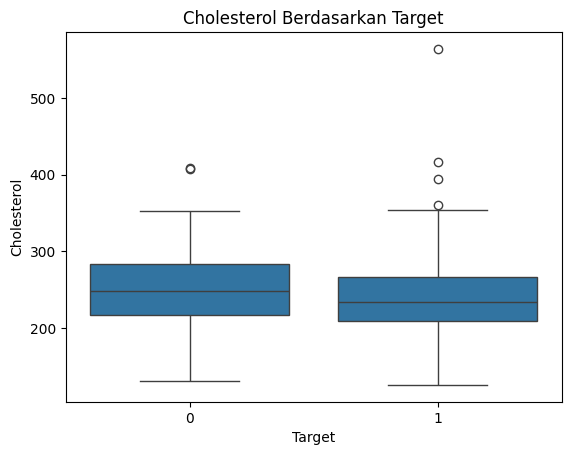

In [41]:
# Box plot untuk cholesterol berdasarkan target
sns.boxplot(x="target", y="chol", data=dataset)
plt.title("Cholesterol Berdasarkan Target")
plt.xlabel("Target")
plt.ylabel("Cholesterol")
plt.show()

<h3> Frekuensi Fasting Blood Sugar (FBS) Berdasarkan Target

In [42]:
# Distribusi fasting blood sugar berdasarkan target
fbs_distribution = dataset.groupby("target")["fbs"].value_counts().unstack()
print("Distribusi Fasting Blood Sugar Berdasarkan Target:")
print(fbs_distribution)

Distribusi Fasting Blood Sugar Berdasarkan Target:
fbs       0   1
target         
0       116  22
1       141  23


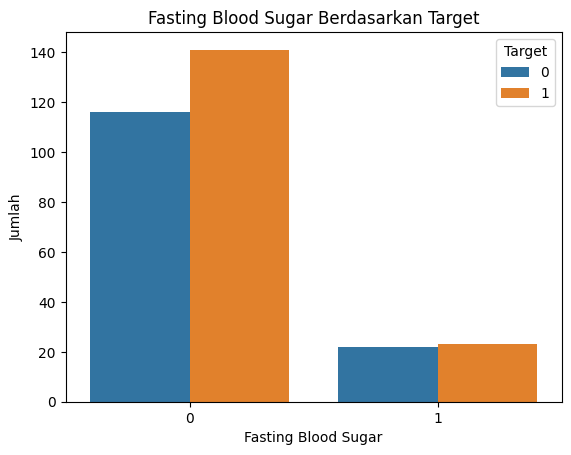

In [43]:
# Count plot untuk fasting blood sugar berdasarkan target
sns.countplot(x="fbs", hue="target", data=dataset)
plt.title("Fasting Blood Sugar Berdasarkan Target")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()

<h3> Rata-rata Denyut Jantung Maksimum Berdasarkan Target

In [44]:
# Rata-rata denyut jantung maksimum berdasarkan target
mean_thalach_by_target = dataset.groupby("target")["thalach"].mean()
print("Rata-rata Denyut Jantung Maksimum Berdasarkan Target:")
print(mean_thalach_by_target)

Rata-rata Denyut Jantung Maksimum Berdasarkan Target:
target
0    139.101449
1    158.378049
Name: thalach, dtype: float64


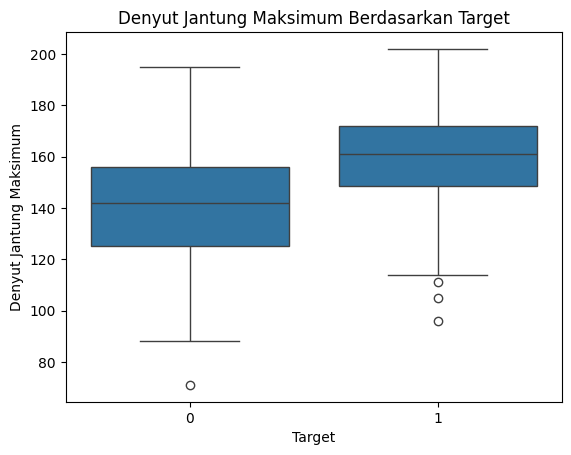

In [45]:
# Box plot untuk denyut jantung maksimum berdasarkan target
sns.boxplot(x="target", y="thalach", data=dataset)
plt.title("Denyut Jantung Maksimum Berdasarkan Target")
plt.xlabel("Target")
plt.ylabel("Denyut Jantung Maksimum")
plt.show()

<h3> Frekuensi Hasil Electrocardiographic Berdasarkan Target

In [46]:
# Distribusi hasil electrocardiographic berdasarkan target
restecg_distribution = dataset.groupby("target")["restecg"].value_counts().unstack()
print("Distribusi Hasil Electrocardiographic Berdasarkan Target:")
print(restecg_distribution)

Distribusi Hasil Electrocardiographic Berdasarkan Target:
restecg   0   1  2
target            
0        79  56  3
1        68  95  1


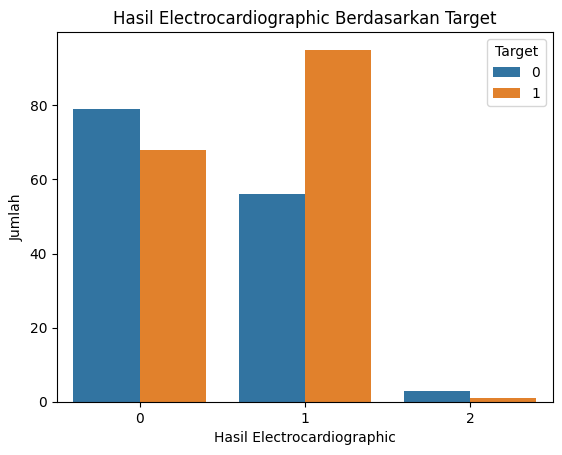

In [47]:
# Count plot untuk hasil electrocardiographic berdasarkan target
sns.countplot(x="restecg", hue="target", data=dataset)
plt.title("Hasil Electrocardiographic Berdasarkan Target")
plt.xlabel("Hasil Electrocardiographic")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()

<h3> Rata-rata Depresi ST Berdasarkan Target

In [48]:
# Rata-rata depresi ST berdasarkan target
mean_oldpeak_by_target = dataset.groupby("target")["oldpeak"].mean()
print("Rata-rata Depresi ST Berdasarkan Target:")
print(mean_oldpeak_by_target)

Rata-rata Depresi ST Berdasarkan Target:
target
0    1.585507
1    0.586585
Name: oldpeak, dtype: float64


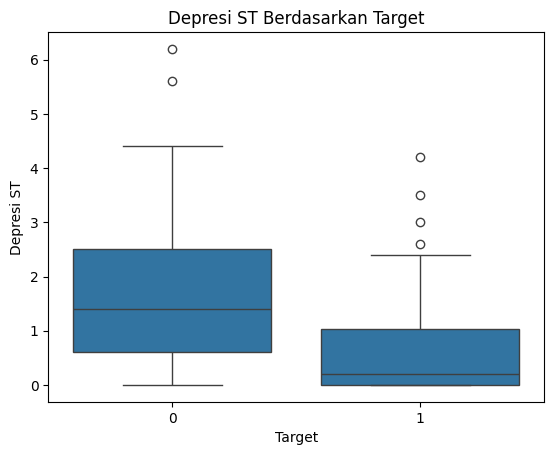

In [49]:
# Box plot untuk depresi ST berdasarkan target
sns.boxplot(x="target", y="oldpeak", data=dataset)
plt.title("Depresi ST Berdasarkan Target")
plt.xlabel("Target")
plt.ylabel("Depresi ST")
plt.show()

<h3> Frekuensi Latihan Induksi Angina Berdasarkan Target

In [50]:
# Distribusi latihan induksi angina berdasarkan target
exang_distribution = dataset.groupby("target")["exang"].value_counts().unstack()
print("Distribusi Latihan Induksi Angina Berdasarkan Target:")
print(exang_distribution)

Distribusi Latihan Induksi Angina Berdasarkan Target:
exang     0   1
target         
0        62  76
1       141  23


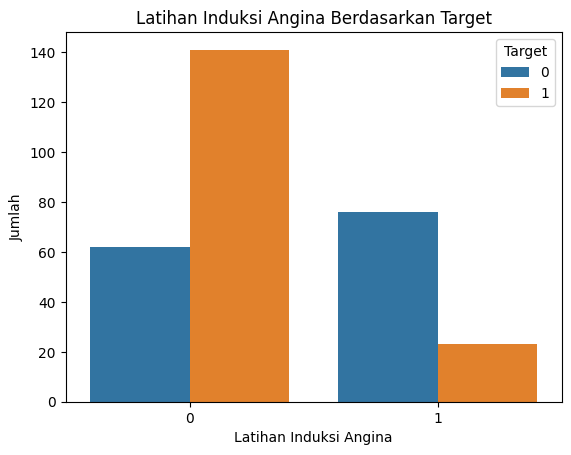

In [51]:
# Count plot untuk latihan induksi angina berdasarkan target
sns.countplot(x="exang", hue="target", data=dataset)
plt.title("Latihan Induksi Angina Berdasarkan Target")
plt.xlabel("Latihan Induksi Angina")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()

<h3> Rata-rata Pembuluh Darah Utama Berdasarkan Target

In [52]:
# Rata-rata pembuluh darah utama berdasarkan target
mean_ca_by_target = dataset.groupby("target")["ca"].mean()
print("Rata-rata Pembuluh Darah Utama Berdasarkan Target:")
print(mean_ca_by_target)

Rata-rata Pembuluh Darah Utama Berdasarkan Target:
target
0    1.166667
1    0.341463
Name: ca, dtype: float64


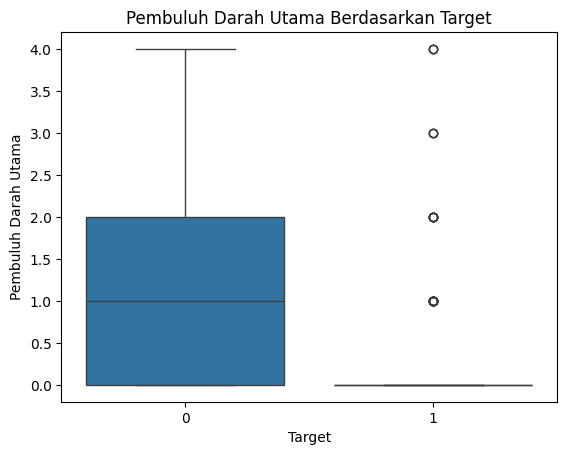

In [53]:
# Box plot untuk pembuluh darah utama berdasarkan target
sns.boxplot(x="target", y="ca", data=dataset)
plt.title("Pembuluh Darah Utama Berdasarkan Target")
plt.xlabel("Target")
plt.ylabel("Pembuluh Darah Utama")
plt.show()

<h3> Frekuensi Hasil Stres Thalium Berdasarkan Target

In [54]:
# Distribusi hasil stres thalium berdasarkan target
thal_distribution = dataset.groupby("target")["thal"].value_counts().unstack()
print("Distribusi Hasil Stres Thalium Berdasarkan Target:")
print(thal_distribution)

Distribusi Hasil Stres Thalium Berdasarkan Target:
thal    0   1    2   3
target                
0       1  12   36  89
1       1   6  129  28


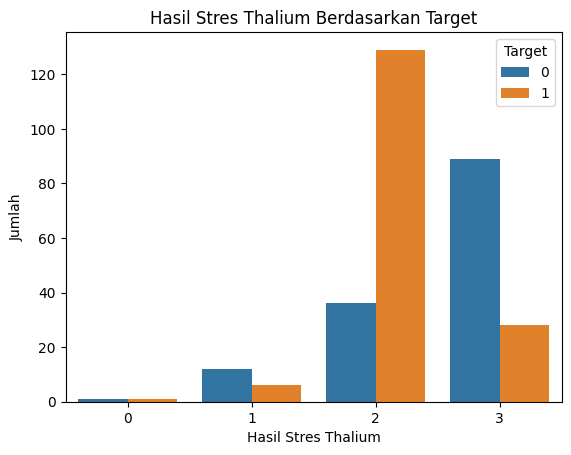

In [55]:
# Count plot untuk hasil stres thalium berdasarkan target
sns.countplot(x="thal", hue="target", data=dataset)
plt.title("Hasil Stres Thalium Berdasarkan Target")
plt.xlabel("Hasil Stres Thalium")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()

<h3>

### Korelasi Berdasarkan Nyeri Dada

In [56]:
# Grouping by age, sex and chest pain type and calculating the mean
cp_relation = dataset.groupby(["age", "sex", "cp"]).size().reset_index(name='counts')
print("Hubungan Usia, Jenis Kelamin, dan Tipe Nyeri Dada:")
print(cp_relation)

Hubungan Usia, Jenis Kelamin, dan Tipe Nyeri Dada:
     age  sex  cp  counts
0     29    1   1       1
1     34    0   1       1
2     34    1   3       1
3     35    0   0       1
4     35    1   0       2
..   ...  ...  ..     ...
153   71    0   1       1
154   71    0   2       1
155   74    0   1       1
156   76    0   2       1
157   77    1   0       1

[158 rows x 4 columns]


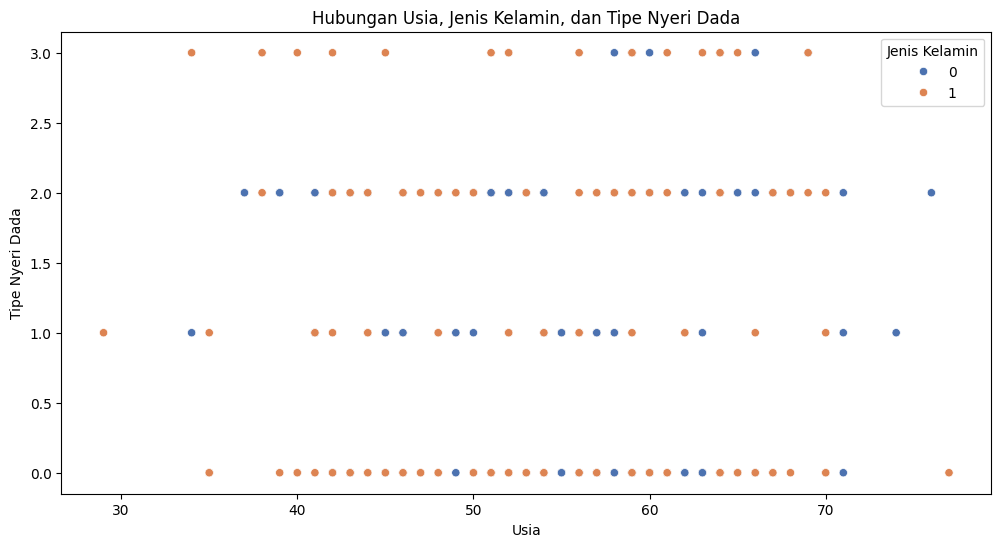

In [57]:
# Visualisasi hubungan usia, jenis kelamin, dan tipe nyeri dada
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x="age", y="cp", hue="sex", palette="deep")
plt.title("Hubungan Usia, Jenis Kelamin, dan Tipe Nyeri Dada")
plt.xlabel("Usia")
plt.ylabel("Tipe Nyeri Dada")
plt.legend(title="Jenis Kelamin", loc='upper right')
plt.show()

### Korelasi Berdasarkan Kolestrol

In [58]:
# Grouping by age, sex and cholesterol and calculating the mean
chol_relation = dataset.groupby(["age", "sex", "chol"]).size().reset_index(name='counts')
print("Hubungan Usia, Jenis Kelamin, dan Kolestrol:")
print(chol_relation)

Hubungan Usia, Jenis Kelamin, dan Kolestrol:
     age  sex  chol  counts
0     29    1   204       1
1     34    0   210       1
2     34    1   182       1
3     35    0   183       1
4     35    1   192       1
..   ...  ...   ...     ...
295   71    0   265       1
296   71    0   302       1
297   74    0   269       1
298   76    0   197       1
299   77    1   304       1

[300 rows x 4 columns]


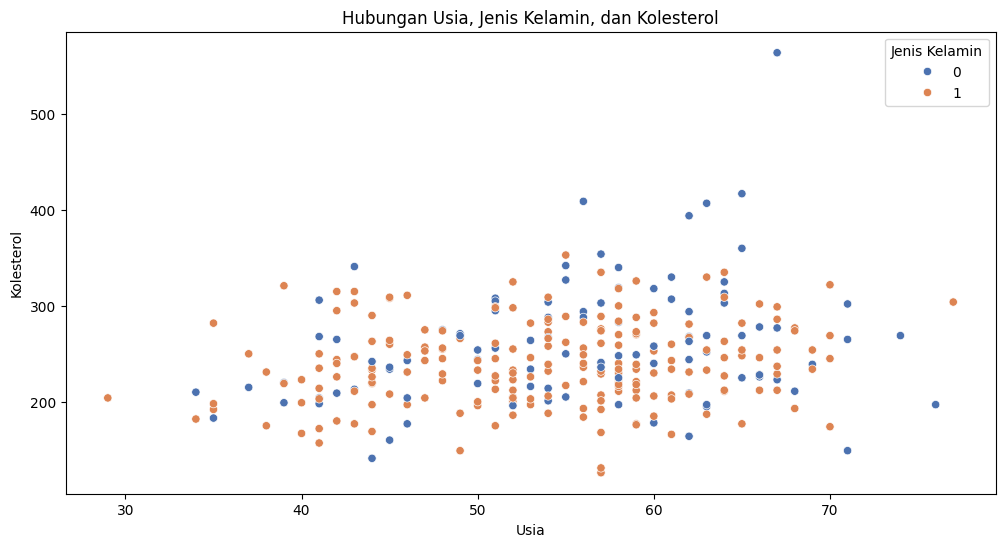

In [59]:
# Visualisasi hubungan usia, jenis kelamin, dan kolesterol
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x="age", y="chol", hue="sex", palette="deep")
plt.title("Hubungan Usia, Jenis Kelamin, dan Kolesterol")
plt.xlabel("Usia")
plt.ylabel("Kolesterol")
plt.legend(title="Jenis Kelamin", loc='upper right')
plt.show()

### Korelasai Berdasarkan Denyut Jantung Maksimum

In [60]:
# Grouping by age, sex and maximum heart rate and calculating the mean
thalach_relation = dataset.groupby(["age", "sex", "thalach"]).size().reset_index(name='counts')
print("Hubungan Usia, Jenis Kelamin, dan Denyut Jantung Maksimum:")
print(thalach_relation)

Hubungan Usia, Jenis Kelamin, dan Denyut Jantung Maksimum:
     age  sex  thalach  counts
0     29    1      202       1
1     34    0      192       1
2     34    1      174       1
3     35    0      182       1
4     35    1      130       1
..   ...  ...      ...     ...
291   71    0      130       1
292   71    0      162       1
293   74    0      121       1
294   76    0      116       1
295   77    1      162       1

[296 rows x 4 columns]


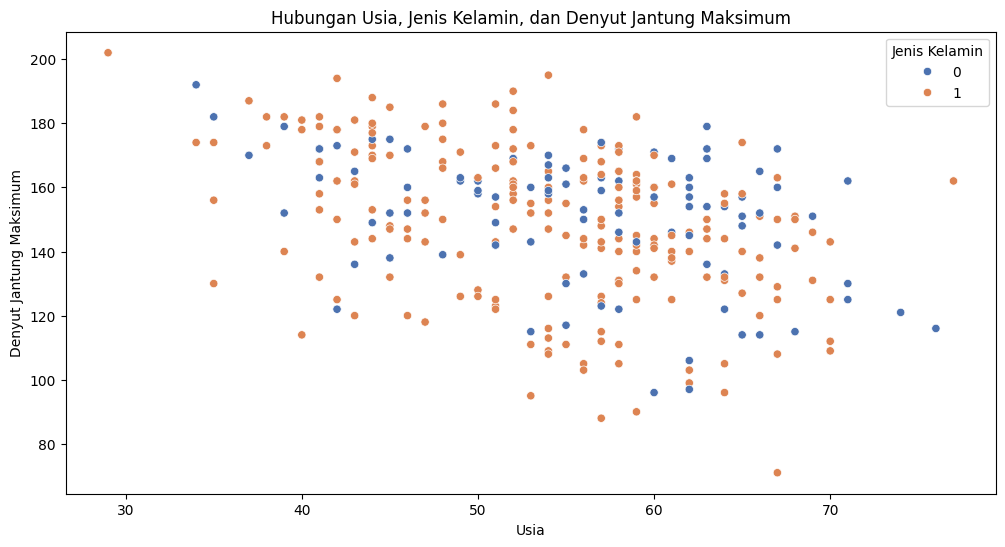

In [61]:
# Visualisasi hubungan usia, jenis kelamin, dan denyut jantung maksimum
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x="age", y="thalach", hue="sex", palette="deep")
plt.title("Hubungan Usia, Jenis Kelamin, dan Denyut Jantung Maksimum")
plt.xlabel("Usia")
plt.ylabel("Denyut Jantung Maksimum")
plt.legend(title="Jenis Kelamin", loc='upper right')
plt.show()

### Korelasi Berdasarkan Olahraga

In [62]:
# Grouping by age, sex and ST depression induced by exercise and calculating the mean
oldpeak_relation = dataset.groupby(["age", "sex", "oldpeak"]).size().reset_index(name='counts')
print("Hubungan Usia, Jenis Kelamin, dan Depresi ST (Oldpeak):")
print(oldpeak_relation)

Hubungan Usia, Jenis Kelamin, dan Depresi ST (Oldpeak):
     age  sex  oldpeak  counts
0     29    1      0.0       1
1     34    0      0.7       1
2     34    1      0.0       1
3     35    0      1.4       1
4     35    1      0.0       2
..   ...  ...      ...     ...
237   71    0      0.4       1
238   71    0      1.6       1
239   74    0      0.2       1
240   76    0      1.1       1
241   77    1      0.0       1

[242 rows x 4 columns]


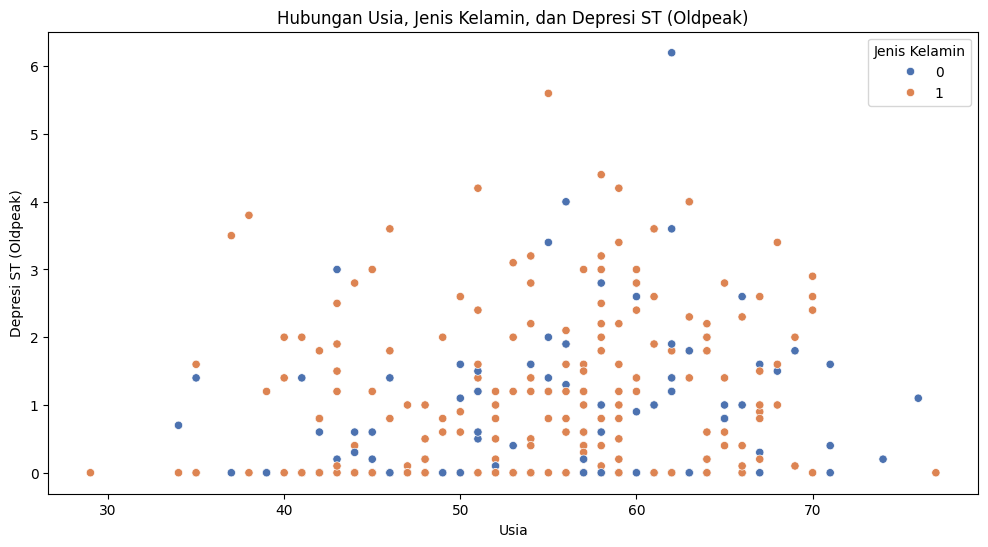

In [63]:
# Visualisasi hubungan usia, jenis kelamin, dan depresi ST (oldpeak)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x="age", y="oldpeak", hue="sex", palette="deep")
plt.title("Hubungan Usia, Jenis Kelamin, dan Depresi ST (Oldpeak)")
plt.xlabel("Usia")
plt.ylabel("Depresi ST (Oldpeak)")
plt.legend(title="Jenis Kelamin", loc='upper right')
plt.show()

# Pembuatan Model Klasifikasi
1. K-Nearest Neighbors (KNN)
2. Support Vector Machine (SVM)
3. Random Forest (RF)

In [64]:
# Load dataset
dataset.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

# Preprocessing
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna()
dataset['target'] = dataset['target'].apply(lambda x: 1 if x > 0 else 0)

# Features and Target
X = dataset.drop("target", axis=1)
y = dataset["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Model Initialization
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Train and Evaluate Models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

In [66]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics["classification_report"])
    print("Confusion Matrix:")
    print(metrics["confusion_matrix"])
    print("\n")

K-Nearest Neighbors:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
[[28  1]
 [ 4 28]]


Support Vector Machine:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion Matrix:
[[27  2]
 [ 6 26]]


Random Forest:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      

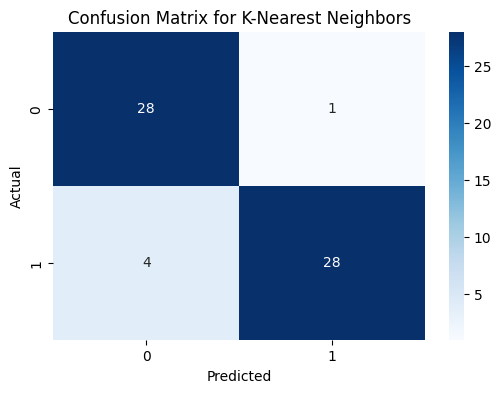

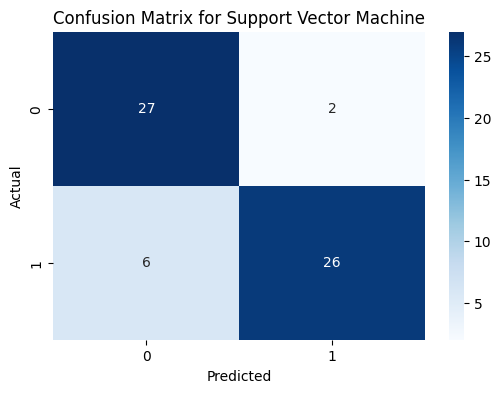

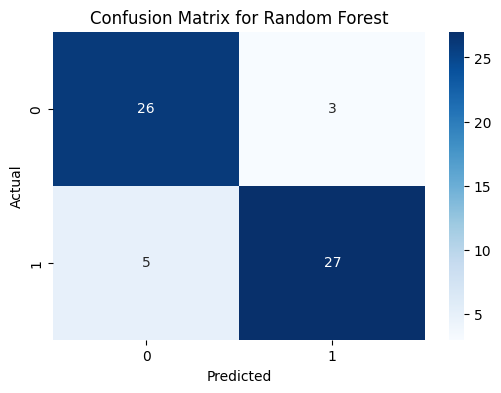

In [67]:
# Visualizing the Confusion Matrix for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Testing Model

In [68]:
# from sklearn.externals import joblib

# Misalkan model yang ingin disimpan adalah model KNN
knn_model = models["K-Nearest Neighbors"]
joblib.dump(knn_model, 'knn_model.pkl')

# Misalkan model SVM
svm_model = models["Support Vector Machine"]
joblib.dump(svm_model, 'svm_model.pkl')

# Misalkan model Random Forest
rf_model = models["Random Forest"]
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [69]:
# Fungsi untuk prediksi berdasarkan model yang telah disimpan
def predict_with_saved_model(model_file, input_data):
    loaded_model = joblib.load(model_file)
    predicted = loaded_model.predict(input_data)
    return predicted

# Contoh input data dari pengguna
user_input = {
    "age": 50,
    "sex": 1,  # 1 untuk laki-laki, 0 untuk perempuan
    "cp": 2,
    "trestbps": 140,
    "chol": 260,
    "fbs": 0,
    "restecg": 1,
    "thalach": 120,
    "exang": 1,
    "oldpeak": 1.5,
    "slope": 1,
    "ca": 0,
    "thal": 3
}

# Transformasi input menjadi format yang bisa diprediksi
input_data = scaler.transform([list(user_input.values())])

# Prediksi dengan masing-masing model
knn_prediction = predict_with_saved_model('knn_model.pkl', input_data)
svm_prediction = predict_with_saved_model('svm_model.pkl', input_data)
rf_prediction = predict_with_saved_model('rf_model.pkl', input_data)

# Output hasil prediksi
print("Hasil Prediksi untuk KNN:", knn_prediction[0])
print("Hasil Prediksi untuk SVM:", svm_prediction[0])
print("Hasil Prediksi untuk Random Forest:", rf_prediction[0])

Hasil Prediksi untuk KNN: 0
Hasil Prediksi untuk SVM: 0
Hasil Prediksi untuk Random Forest: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
user_input = {
    "age": 40,
    "sex": 0,  # 1 untuk laki-laki, 0 untuk perempuan
    "cp": 1,
    "trestbps": 120,
    "chol": 200,
    "fbs": 0,
    "restecg": 0,
    "thalach": 160,
    "exang": 0,
    "oldpeak": 0.5,
    "slope": 2,
    "ca": 1,
    "thal": 2
}

# Transformasi input menjadi format yang bisa diprediksi
input_data = scaler.transform([list(user_input.values())])

# Prediksi dengan masing-masing model
knn_prediction = predict_with_saved_model('knn_model.pkl', input_data)
svm_prediction = predict_with_saved_model('svm_model.pkl', input_data)
rf_prediction = predict_with_saved_model('rf_model.pkl', input_data)

# Output hasil prediksi
print("Hasil Prediksi untuk KNN:", knn_prediction[0])
print("Hasil Prediksi untuk SVM:", svm_prediction[0])
print("Hasil Prediksi untuk Random Forest:", rf_prediction[0])

Hasil Prediksi untuk KNN: 1
Hasil Prediksi untuk SVM: 1
Hasil Prediksi untuk Random Forest: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
# Input data pengguna
user_input = {
    "age": 65,
    "sex": 0,  # Perempuan
    "cp": 1,   # Atypical angina
    "trestbps": 145,
    "chol": 280,
    "fbs": 1,  # Fasting blood sugar > 120 mg/dl
    "restecg": 0,  # Normal resting electrocardiographic results
    "thalach": 130,
    "exang": 1,  # Ada latihan diinduksi angina
    "oldpeak": 2.0,
    "slope": 1,  # Flatsloping
    "ca": 2,  # 2 pembuluh darah utama
    "thal": 3  # Normal thalium stress test result
}

# Transformasi input menjadi format yang bisa diprediksi
input_data = scaler.transform([list(user_input.values())])

# Prediksi dengan masing-masing model
knn_prediction = predict_with_saved_model('knn_model.pkl', input_data)
svm_prediction = predict_with_saved_model('svm_model.pkl', input_data)
rf_prediction = predict_with_saved_model('rf_model.pkl', input_data)

print("Hasil Prediksi untuk KNN:", knn_prediction[0])
print("Hasil Prediksi untuk SVM:", svm_prediction[0])
print("Hasil Prediksi untuk Random Forest:", rf_prediction[0])

Hasil Prediksi untuk KNN: 0
Hasil Prediksi untuk SVM: 0
Hasil Prediksi untuk Random Forest: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
